# 1. Project description

## Explanation of the dataset.



### Install necessary software

In [1]:
!pip install pysam pandas seaborn graphkb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 7.9 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.6
    Uninstalling urllib3-2.0.6:
      Successfully uninstalled urllib3-2.0.6
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependenc

In [2]:
pip install aplanat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.5/297.5 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.4/161.4 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.8/87.8 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for aplanat: filename=aplanat-0.6.16-py3-none-any.whl size=306795 sha256=cd81ef86d2bc55338607972a6493123532e2a6b2c45234dfe019d989635cfdd5
  Stored in directory: /root/.cache/pip/wheels/dc/2d/f6/7779b88d72be0597d4c27897ecc1e2ffa01470fd147d74925a
  Created wheel for si-prefix: filename=si_prefix-1.2.2-py3-none-any.whl size=5860 sha256=8682acd234e0244cf9e95c5bb1cfdb6ab403ce081eae1d0b3cefe54d005a45fd
  Stored in directory: /root/.cache/pip/wheels/3d/bf/4f/

In [3]:
pip install scikit-allel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 11.7 MB/s eta 0:00:00


### Import all packages that will be used

In [4]:
# Numpy for data management
import numpy as np

# Pandas also for data management
import pandas as pd

# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

#ScikitLearn

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold

from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import KFold

from sklearn.neighbors import KernelDensity

from sklearn.model_selection import StratifiedKFold

from sklearn.utils import shuffle

from sklearn.naive_bayes import GaussianNB

from sklearn.utils import shuffle

from scipy.stats import mode

from google.colab import files #this is to load files from your local disk

from sklearn.svm import LinearSVC

from sklearn.svm import SVC

from pysam import VariantFile

import itertools

from bokeh.layouts import gridplot
import aplanat
from aplanat import bars
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.sparse.construct import hstack
import re
import allel


<ipython-input-4-722a4d47e3d2>:52: DeprecationWarning: Please use `hstack` from the `scipy.sparse` namespace, the `scipy.sparse.construct` namespace is deprecated.
  from scipy.sparse.construct import hstack


### Aux functions

In [22]:
def parse_vcf(fname, info_cols=None, nrows=None):
    """Parse a VCF file into a dataframe.
    The INFO column is parsed into a dictionary with specified dtype in distinct column.
    nrows: how many rows to read from the start of the header.
    Example:
    vcf_df_GT = parse_vcf('test.vcf', info_cols={'DP':int,'CIGAR':str,}, nrows=1000)
    """
    header = "CHROM POS ID REF ALT QUAL FILTER INFO FORMAT GT".split()
    vcf = pd.read_csv(
        fname, delimiter='\t', comment='#', names=header, nrows=nrows)
    # create a dictionary out of INFO field
    vcf['INFO'] = vcf['INFO'].str.split(";") \
        .apply(lambda x: dict([y.split("=") for y in x]))
    if info_cols is not None:
        for field, dtype in info_cols.items():
            try:
                vcf[field] = vcf['INFO'].apply(lambda x: x.get(field, None))
                vcf[field] = vcf[field].astype(dtype)
            except:
                pass
    return vcf

def parse_vcf2(fname, info_cols=None, nrows=None):
    """Parse a VCF file into a dataframe.
    The INFO column is parsed into a dictionary with specified dtype in distinct column.
    nrows: how many rows to read from the start of the header.
    Example:
    vcf_df_GT = parse_vcf('test.vcf', info_cols={'DP':int,'CIGAR':str,}, nrows=1000)
    """
    header = "CHROM POS ID REF ALT QUAL FILTER INFO FORMAT GT GT2".split()
    vcf = pd.read_csv(
        fname, delimiter='\t', comment='#', names=header, nrows=nrows)
    # create a dictionary out of INFO field
    vcf['INFO'] = vcf['INFO'].str.split(";") \
        .apply(lambda x: dict([y.split("=") for y in x]))
    if info_cols is not None:
        for field, dtype in info_cols.items():
            try:
                vcf[field] = vcf['INFO'].apply(lambda x: x.get(field, None))
                vcf[field] = vcf[field].astype(dtype)
            except:
                pass
    return vcf




def match_groudtruth (dataset, gt_dataset):
  """ Return dataset with ground truth data (1 for variant and 0 for false positive)
  based on the provided gt_dataset. Return dataset only with continous features. This function
  is to be used for creating dataset for training with ML classifiers.
 """
  dataset2=dataset.assign(GROUND=dataset.POS.isin(gt_dataset.POS).astype(int))
  dataset3= dataset2.loc[:,((dataset2.dtypes=='float64').values | (dataset2.dtypes=='int').values)]
  dataset4 = dataset3.set_index('POS')
  return dataset4


def confusion_matrix(dataset, gt_dataset, genome_size):
    """
    Based on the dataset that was generated from variant caller pipeline and ground truth dataset
    (all known mutations, e.g., all true positives) calculate the confusion matrix.
    """
    d_P = dataset["POS"].values
    g_P = gt_dataset["POS"].values
    matrix = np.zeros((2, 2))  # Matrix of 2 by 2 (added a missing closing parenthesis)
    matrix[1, 1] = genome_size - len(gt_dataset)  # True Negatives
    for i in d_P:
        if i in g_P:
            matrix[0, 0] += 1  # True Positives
        elif i not in g_P:
            matrix[0, 1] += 1  # False Positives
    for k in g_P:
        if k not in d_P:
            matrix[1, 0] += 1  # False Negatives
    return matrix




import matplotlib.pyplot as plt

def plot_custom_confusion_matrix(confusion_matrix, title="Confusion Matrix"):
    """
    This function plots a custom 2x2 confusion matrix with specified colors by name and labels for TP, TN, FP, FN.

    Args:
    confusion_matrix (list of lists): A 2x2 confusion matrix in the format [[TP, FP], [FN, TN]]
    title (str): Custom title for the confusion matrix (optional)

    Returns:
    None
    """
    class_names = ['Positive', 'Negative']

    plt.imshow(confusion_matrix, interpolation='nearest', cmap='gray', vmin=0, vmax=1, aspect='auto')  # Light gray background
    plt.title(title)  # Set the custom title

    tick_marks = [0, 1]
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

    labels = ["TP", "FP", "FN", "TN"]
    for i in range(2):
        for j in range(2):
            if i == j:
                color = 'green'  # TP and TN in limegreen
            else:
                color = 'red'    # FP and FN in pink
            plt.text(j, i, str(confusion_matrix[i][j]), horizontalalignment="center", color=color)
            plt.text(j, i-0.2, labels[i*2+j], horizontalalignment="center")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Example usage with a custom title:
# Replace the example matrix with your actual 2x2 confusion matrix
# custom_matrix = [[42, 8], [12, 38]]
# plot_custom_confusion_matrix(custom_matrix, title="Confusion Matrix - My Title")




def metrics(matrix, calculate=None):
  """Function to calculate metrics for different variant callers based on confusion matrix.
  If no second argument is given, returns all the metrics. If particular metric is necessary,
  define the argument in the following way.
  Example:
  precision=metrics(matrix, "precision")
  """
  precision=matrix[0,0]/(matrix[0,0]+matrix[0,1])
  recall= matrix[0,0]/(matrix[0,0]+matrix[1,0])
  accuracy=(matrix[0,0]+matrix[1,1])/(matrix[0,0]+matrix[0,1]+matrix[1,0]+matrix[1,1])
  f1=2*(recall*precision)/(recall+precision)
  metrics=[precision, recall, accuracy, f1]
  if calculate is None:
    return metrics
  elif calculate == "precision":
    return precision
  elif calculate == "recall":
    return recall
  elif calculate == "accuracy":
    return accuracy
  elif calculate == "f1":
    return f1


def TPR_FPR(dataset, gt_dataset, genome_size): #pass dataframe from variant caller and GT dataframe
    d_P=dataset["POS"].values
    g_P=gt_dataset["POS"].values
    matrix=np.zeros((2,2)) # matrix of 2 by 2
    matrix[1,1]=genome_size - len(gt_dataset) # True Negatives
    for i in d_P:
        if i in g_P:
            matrix[0,0]+=1 #True Positives
        elif i not in g_P:
            matrix[0,1]+=1 #False Positives
    for k in g_P:
      if k not in d_P:
        matrix[1,0]=+1 #False Negatives
    TPR=matrix[0,0]/(matrix[0,0]+matrix[1,0])
    FPR=matrix[0,1]/(matrix[1,1]+matrix[0,1])
    return TPR, FPR

def random_split_by_number(data,test_points):
 """return two matrices splitting the data at random
    Example:
    train, temp = random_split_by_number(data, 39)
    valid, test = random_split_by_number(temp, 20)
 """
 ranks = np.arange(data.shape[0])
 np.random.shuffle(ranks)
 train = data[ranks>=test_points,:]
 test = data[ranks<test_points,:]
 return train,test

def parse_vcf_mutect(fname, info_cols=None, nrows=None):
    """Parse a VCF file into a dataframe.
    The INFO column is parsed into a dictionary with specified dtype in distinct column.
    nrows: how many rows to read from the start of the header.
    Example:
    vcf_df_GT = parse_vcf('test.vcf', info_cols={'DP': int, 'CIGAR': str}, nrows=1000)
    """
    header = "CHROM POS ID REF ALT QUAL FILTER INFO FORMAT GT".split()
    vcf = pd.read_csv(
        fname, delimiter='\t', comment='#', names=header, nrows=nrows)

    def parse_info(info_str):
        info_dict = {}
        for item in info_str.split(";"):
            parts = item.split("=")
            if len(parts) == 2:
                key, value = parts
            else:
                key = parts[0]
                value = ""
            info_dict[key] = value
        return info_dict

    vcf['INFO'] = vcf['INFO'].apply(parse_info)

    if info_cols is not None:
        for field, dtype in info_cols.items():
            try:
                vcf[field] = vcf['INFO'].apply(lambda x: x.get(field, None))
                vcf[field] = vcf[field].astype(dtype)
            except:
                pass
    return vcf







/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### GT import

In [6]:
from google.colab import files
uploaded = files.upload()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Saving GT_832.csv to GT_832.csv


In [7]:
import io
vcf_df_GT = pd.read_csv(io.BytesIO(uploaded['GT_832.csv']))
vcf_df_GT

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CHROM,POS,ID,REF,ALT,QUAL,FILTER
0,AE017196,3915,.,C,T,54123.500,PASS
1,AE017196,10452,.,T,G,29524.400,PASS
2,AE017196,12060,.,C,T,1109.260,PASS
3,AE017196,12225,.,C,T,477.204,PASS
4,AE017196,12863,.,T,C,1248.810,PASS
...,...,...,...,...,...,...,...
827,AE017196,1257121,.,C,T,8260.820,PASS
828,AE017196,1258432,.,A,G,1014.820,PASS
829,AE017196,1260309,.,C,T,10111.700,PASS
830,AE017196,1261032,.,A,T,959.379,PASS


In [70]:
from google.colab import files
GT = files.upload()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Saving GT_filtered_for_ML.csv to GT_filtered_for_ML.csv


In [72]:
filtered_GT_ML = pd.read_csv(io.BytesIO(GT['GT_filtered_for_ML.csv']), sep=";")
filtered_GT_ML

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,CHROM_x,POS,ID_x,REF_x,ALT_x,QUAL_x,FILTER_x
0,0,AE017196,3915,.,C,T,54123.500,PASS
1,1,AE017196,10452,.,T,G,29524.400,PASS
2,2,AE017196,12060,.,C,T,1109.260,PASS
3,4,AE017196,12863,.,T,C,1248.810,PASS
4,6,AE017196,13072,.,T,C,2371.530,PASS
...,...,...,...,...,...,...,...,...
701,827,AE017196,1257121,.,C,T,8260.820,PASS
702,828,AE017196,1258432,.,A,G,1014.820,PASS
703,829,AE017196,1260309,.,C,T,10111.700,PASS
704,830,AE017196,1261032,.,A,T,959.379,PASS


### Upload datasets

In [8]:
info_cols_min={'TLOD':int}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [79]:
Mutect100 = parse_vcf_mutect('var100_mutect2.vcf', info_cols=None, nrows=20000)
Mutect50 = parse_vcf_mutect('var50_mutect2.vcf', info_cols=None, nrows=20000)
Mutect40 = parse_vcf_mutect('var40_mutect2.vcf', info_cols=None, nrows=20000)
Mutect30 = parse_vcf_mutect('var30_mutect2.vcf', info_cols=None, nrows=20000)
Mutect20 = parse_vcf_mutect('var20_mutect2.vcf', info_cols=None, nrows=20000)
Mutect10 = parse_vcf_mutect('var10_mutect2.vcf', info_cols=None, nrows=20000)
Mutect5 = parse_vcf_mutect('var5_mutect2.vcf', info_cols=None, nrows=20000)
Mutect4 = parse_vcf_mutect('var4_mutect2.vcf', info_cols=None, nrows=20000)
Mutect3 = parse_vcf_mutect('var3_mutect2.vcf', info_cols=None, nrows=20000)
Mutect2 = parse_vcf_mutect('var2_mutect2.vcf', info_cols=None, nrows=20000)
Mutect1 = parse_vcf_mutect('var1_mutect2.vcf', info_cols=None, nrows=20000)
Mutect05 = parse_vcf_mutect('var05_mutect2.vcf', info_cols=None, nrows=20000)
Mutect025 = parse_vcf_mutect('var025_mutect2.vcf', info_cols=None, nrows=20000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Check in each variant caller, how many TP are called at 100% freq

In [23]:
Mutect100 = parse_vcf_mutect('var100_mutect2.vcf', info_cols=None, nrows=20000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
Freebayes100 = parse_vcf('var100.vcf', info_cols=None, nrows=20000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
GATK100 = parse_vcf('var100_GATK.vcf', info_cols=None, nrows=20000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
GATKp100 = parse_vcf('var100_GATKp.vcf', info_cols=None, nrows=20000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
Strelka100 = parse_vcf('variants.vcf', info_cols=None, nrows=20000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
type(Mutect100)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


pandas.core.frame.DataFrame

In [34]:
#vcf_df_GT

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Confusion matrix

In [25]:
Mutect100_CF=confusion_matrix(Mutect100, vcf_df_GT, genome_size=1267843) #1267843 genome size
Mutect100_CF

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[6.910000e+02, 2.590000e+02],
       [1.370000e+02, 1.267011e+06]])

In [30]:
Freebayes100_CF=confusion_matrix(Freebayes100, vcf_df_GT, genome_size=1267843) #1267843 genome size
Freebayes100_CF

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[6.800000e+02, 7.900000e+01],
       [1.480000e+02, 1.267011e+06]])

In [31]:
GATK100_CF=confusion_matrix(GATK100, vcf_df_GT, genome_size=1267843) #1267843 genome size
GATK100_CF

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[6.890000e+02, 1.000000e+02],
       [1.390000e+02, 1.267011e+06]])

In [27]:
GATKp100_CF=confusion_matrix(GATKp100, vcf_df_GT, genome_size=1267843) #1267843 genome size
GATKp100_CF

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[6.920000e+02, 2.870000e+02],
       [1.360000e+02, 1.267011e+06]])

In [28]:
Strelka100_CF=confusion_matrix(Strelka100, vcf_df_GT, genome_size=1267843) #1267843 genome size
Strelka100_CF

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[6.980000e+02, 3.000000e+03],
       [1.300000e+02, 1.267011e+06]])

Make a filtered GT, variants that were never picked up in 100% in any of the callers should be filterd out

In [51]:
dfs = [vcf_df_GT, Freebayes100, Mutect100, GATK100, GATKp100, Strelka100]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
import functools as ft
df_final = ft.reduce(lambda left, right: pd.merge(left, right, on='POS'), dfs)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-50-e7d9131a1cb0>:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'QUAL_x', 'ALT_x', 'FILTER_x', 'REF_x', 'CHROM_x', 'ID_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_final = ft.reduce(lambda left, right: pd.merge(left, right, on='POS'), dfs)
<ipython-input-50-e7d9131a1cb0>:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'FORMAT_x', 'GT_x', 'INFO_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_final = ft.reduce(lambda left, right: pd.merge(left, right, on='POS'), dfs)
<ipython-input-50-e7d9131a1cb0>:2: Futur

In [52]:
df_final2 = ft.reduce(lambda left, right: pd.merge(left, right, on='POS', how='left'), dfs)
 ### This is a left join by GT, I deleted after variants that did not appear in any of variant callers and renamed a new dataset GT_filtered_for_ML.csv


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-52-352e15989957>:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'QUAL_x', 'ALT_x', 'FILTER_x', 'REF_x', 'CHROM_x', 'ID_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_final2 = ft.reduce(lambda left, right: pd.merge(left, right, on='POS', how='left'), dfs)
<ipython-input-52-352e15989957>:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'FORMAT_x', 'GT_x', 'INFO_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_final2 = ft.reduce(lambda left, right: pd.merge(left, right, on='POS', how='left'), dfs)
<ipython-input

In [57]:
df_final3 = ft.reduce(lambda left, right: pd.merge(left, right, on='POS', how='inner'), dfs)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-57-f72bbfaceada>:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'QUAL_x', 'ALT_x', 'FILTER_x', 'REF_x', 'CHROM_x', 'ID_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_final3 = ft.reduce(lambda left, right: pd.merge(left, right, on='POS', how='inner'), dfs)
<ipython-input-57-f72bbfaceada>:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'FORMAT_x', 'GT_x', 'INFO_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_final3 = ft.reduce(lambda left, right: pd.merge(left, right, on='POS', how='inner'), dfs)
<ipython-inp

In [59]:
df_final4 = ft.reduce(lambda left, right: pd.merge(left, right, on='POS', how='outer'), dfs)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-59-fd083d77f689>:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'QUAL_x', 'ALT_x', 'FILTER_x', 'REF_x', 'CHROM_x', 'ID_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_final4 = ft.reduce(lambda left, right: pd.merge(left, right, on='POS', how='outer'), dfs)
<ipython-input-59-fd083d77f689>:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'FORMAT_x', 'GT_x', 'INFO_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_final4 = ft.reduce(lambda left, right: pd.merge(left, right, on='POS', how='outer'), dfs)
<ipython-inp

In [60]:
len(df_final4)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


4028

In [55]:
GT_filtered=df_final
GT_filtered2=df_final2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
from google.colab import files
GT_filtered.to_csv('GT_filtered.csv')
files.download('GT_filtered.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [56]:
from google.colab import files
GT_filtered2.to_csv('GT_filtered2.csv')
files.download('GT_filtered2.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [36]:
vcf_df_GT

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CHROM,POS,ID,REF,ALT,QUAL,FILTER
0,AE017196,3915,.,C,T,54123.500,PASS
1,AE017196,10452,.,T,G,29524.400,PASS
2,AE017196,12060,.,C,T,1109.260,PASS
3,AE017196,12225,.,C,T,477.204,PASS
4,AE017196,12863,.,T,C,1248.810,PASS
...,...,...,...,...,...,...,...
827,AE017196,1257121,.,C,T,8260.820,PASS
828,AE017196,1258432,.,A,G,1014.820,PASS
829,AE017196,1260309,.,C,T,10111.700,PASS
830,AE017196,1261032,.,A,T,959.379,PASS


### Calculate metrics on filtered GT

In [75]:
Freebayes100f_CF=confusion_matrix(Freebayes100, filtered_GT_ML, genome_size=1267843) #1267843 genome size
Freebayes100f_CF

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[6.800000e+02, 7.900000e+01],
       [2.200000e+01, 1.267137e+06]])

In [77]:
Mutect100f_CF=confusion_matrix(Mutect100, filtered_GT_ML, genome_size=1267843) #1267843 genome size
Mutect100f_CF

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[6.910000e+02, 2.590000e+02],
       [1.100000e+01, 1.267137e+06]])

### Plot confusion matrix

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


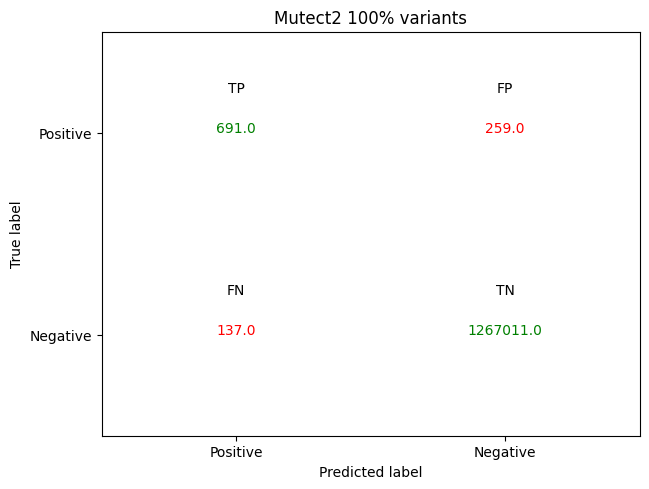

In [47]:
plot=plot_custom_confusion_matrix(Mutect100_CF, title="Mutect2 100% variants")
plot

### Metrics for Strelka

In [108]:
Strelka100_CF=confusion_matrix(Strelka100, vcf_df_GT, genome_size=1267843)
Strelka50_CF=confusion_matrix(Strelka50, vcf_df_GT, genome_size=1267843)
Strelka40_CF=confusion_matrix(Strelka40, vcf_df_GT, genome_size=1267843)
Strelka30_CF=confusion_matrix(Strelka30, vcf_df_GT, genome_size=1267843)
Strelka20_CF=confusion_matrix(Strelka20, vcf_df_GT, genome_size=1267843)
Strelka10_CF=confusion_matrix(Strelka10, vcf_df_GT, genome_size=1267843)
Strelka5_CF=confusion_matrix(Strelka5, vcf_df_GT, genome_size=1267843)
Strelka4_CF=confusion_matrix(Strelka4, vcf_df_GT, genome_size=1267843)
Strelka3_CF=confusion_matrix(Strelka3, vcf_df_GT, genome_size=1267843)
Strelka2_CF=confusion_matrix(Strelka2, vcf_df_GT, genome_size=1267843)
Strelka1_CF=confusion_matrix(Strelka1, vcf_df_GT, genome_size=1267843)
Strelka05_CF=confusion_matrix(Strelka05, vcf_df_GT, genome_size=1267843)
Strelka025_CF=confusion_matrix(Strelka025, vcf_df_GT, genome_size=1267843)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [81]:
Mutect100_CF=confusion_matrix(Mutect100, vcf_df_GT, genome_size=1267843)
Mutect50_CF=confusion_matrix(Mutect50, vcf_df_GT, genome_size=1267843)
Mutect40_CF=confusion_matrix(Mutect40, vcf_df_GT, genome_size=1267843)
Mutect30_CF=confusion_matrix(Mutect30, vcf_df_GT, genome_size=1267843)
Mutect20_CF=confusion_matrix(Mutect20, vcf_df_GT, genome_size=1267843)
Mutect10_CF=confusion_matrix(Mutect10, vcf_df_GT, genome_size=1267843)
Mutect5_CF=confusion_matrix(Mutect5, vcf_df_GT, genome_size=1267843)
Mutect4_CF=confusion_matrix(Mutect4, vcf_df_GT, genome_size=1267843)
Mutect3_CF=confusion_matrix(Mutect3, vcf_df_GT, genome_size=1267843)
Mutect2_CF=confusion_matrix(Mutect2, vcf_df_GT, genome_size=1267843)
Mutect1_CF=confusion_matrix(Mutect1, vcf_df_GT, genome_size=1267843)
Mutect05_CF=confusion_matrix(Mutect05, vcf_df_GT, genome_size=1267843)
Mutect025_CF=confusion_matrix(Mutect025, vcf_df_GT, genome_size=1267843)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Metrics for Mutect2

In [106]:
pr=metrics(Mutect025_CF, "precision")
pr

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.04838709677419355

In [107]:
rec=metrics(Mutect025_CF, "recall")
rec

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.007220216606498195

### Metrics for Strelka

In [174]:
Strelka = parse_vcf_mutect('variants.vcf', info_cols=None, nrows=20000)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [175]:
CF=confusion_matrix(Strelka, vcf_df_GT, genome_size=1267843)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [176]:
pr=metrics(CF, "precision")
pr

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.0033

In [177]:
rec=metrics(CF, "recall")
rec

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.07942238267148015

Iterate vcf files from folder

In [ ]:
import os


folder_path = '/content/drive/MyDrive/VCF_files/freebayes/same_freq/'

data_list = []  # Create an empty list to hold the data

# Iterate through each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.vcf'):  # Check if the file is a VCF file
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r') as file:
            vcf_reader = parse_vcf(file, info_cols= info_cols_min, nrows=2000)
            TPR,FPR = TPR_FPR(vcf_reader, gt_dataset=vcf_df_GT, genome_size=2000)
            data_list.append((TPR,FPR))
sorted_list = sorted(data_list, key=lambda x: x[1])

            #for record in vcf_reader:
           #     data_list.append(record)  # Add each record to the list

print(sorted_list)  # Print the list of data


[(0.9975308641975309, 0.033112582781456956), (0.9975609756097561, 0.03391232423490488), (0.997737556561086, 0.03550784475639967), (0.9978858350951374, 0.04730831973898858), (0.9985315712187959, 0.06335204490777867), (0.9980353634577603, 0.09316770186335403), (0.9897959183673469, 0.14054451802796172), (0.9973404255319149, 0.1916955017301038), (0.9972677595628415, 0.22955145118733508), (0.9974554707379135, 0.27812113720642767), (0.9975369458128078, 0.5328), (0.9166666666666666, 0.6300285080772886), (0.5, 0.6311967161351437)]


In [ ]:
sorted_list

[(0.9975308641975309, 0.033112582781456956),
 (0.9975609756097561, 0.03391232423490488),
 (0.997737556561086, 0.03550784475639967),
 (0.9978858350951374, 0.04730831973898858),
 (0.9985315712187959, 0.06335204490777867),
 (0.9980353634577603, 0.09316770186335403),
 (0.9897959183673469, 0.14054451802796172),
 (0.9973404255319149, 0.1916955017301038),
 (0.9972677595628415, 0.22955145118733508),
 (0.9974554707379135, 0.27812113720642767),
 (0.9975369458128078, 0.5328),
 (0.9166666666666666, 0.6300285080772886),
 (0.5, 0.6311967161351437)]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### ROC curves
An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters: True Positive Rate. False Positive Rate

In [ ]:
def TPR_FPR(dataset, gt_dataset, genome_size): #pass dataframe from variant caller and GT dataframe
    d_P=dataset["POS"].values
    g_P=gt_dataset["POS"].values
    matrix=np.zeros((2,2)) # matrix of 2 by 2
    matrix[1,1]=genome_size - len(gt_dataset) # True Negatives
    for i in d_P:
        if i in g_P:
            matrix[0,0]+=1 #True Positives
        elif i not in g_P:
            matrix[0,1]+=1 #False Positives
    for k in g_P:
      if k not in d_P:
        matrix[1,0]=+1 #False Negatives
    TPR=matrix[0,0]/(matrix[0,0]+matrix[1,0]) #True positive rate
    FPR=matrix[0,1]/(matrix[1,1]+matrix[0,1]) #False positive rate
    return TPR, FPR

In [ ]:
TPR,FPR =TPR_FPR(vcf_df_data,vcf_df_GT,genome_size=1300000)
TPR, FPR


(0.9897959183673469, 0.0001469955570400482)

In [ ]:
TPR = [x[0] for x in data_list]
TPR

[0.9897959183673469,
 0.9975308641975309,
 0.9973404255319149,
 0.9974554707379135,
 0.9972677595628415,
 0.997737556561086,
 0.9978858350951374,
 0.9985315712187959,
 0.9980353634577603,
 0.9975369458128078,
 0.9166666666666666,
 0.5,
 0.9975609756097561]

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
def plot_roc_curve(tuple_list):
    tpr = [x[0] for x in tuple_list]
    fpr = [x[1] for x in tuple_list]
    roc_auc = auc(fpr, tpr)
    # Plot the ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
my_list = [(0.2, 0), (0.4, 0), (0.5, 0.2), (0.6, 0.2), (0.8, 0.25), (0.85, 0.4), (0.95, 0.6), (1.0, 0.8)]
my_list

[(0.2, 0),
 (0.4, 0),
 (0.5, 0.2),
 (0.6, 0.2),
 (0.8, 0.25),
 (0.85, 0.4),
 (0.95, 0.6),
 (1.0, 0.8)]

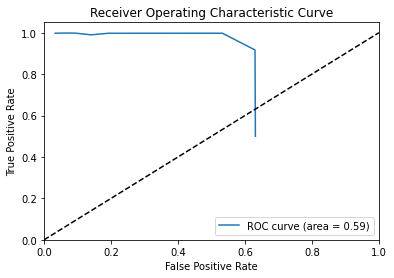

In [ ]:
plot=plot_roc_curve(sorted_list)

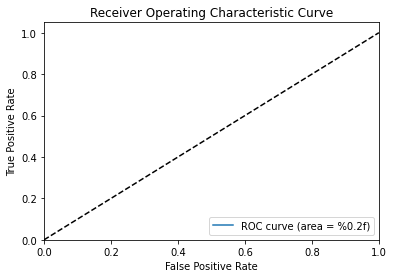

In [ ]:
  # Plot the ROC curve

  plt.plot(FPR, TPR, label='ROC curve (area = %0.2f)')
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic Curve')
  plt.legend(loc="lower right")
  plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc

def compute_roc_curve(y_true, y_pred):
    # Compute the ROC curve and AUC for the given true labels and predictions
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

# **Part II - training data with different ML models**



*  Chosen threshold for calling all mutations will be 0.5% frequency
*  Call at 0.5% with Freebayes, GATKp100,



### Generate a dataframe for training classifiers

In [ ]:
dataset_small=match_groudtruth(vcf_df_data,vcf_df_GT)
dataset_small

,QUAL,AO,DP,QA,QR,RO,RPL,SAF,SAR,SRF,SRR,GROUND
POS,,,,,,,,,,,,
3915,6.590090e+02,83,143,2760,2001,59,51,36,47,37,22,1
10452,1.704090e-09,65,133,2205,2317,68,33,30,35,39,29,0
12060,1.222290e-13,61,142,2087,2692,81,27,31,30,41,40,0
13072,3.108420e+01,67,129,2279,2120,62,39,32,35,24,38,1
15742,1.163890e+01,63,126,2143,2126,63,33,35,28,31,32,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1257121,8.622340e+01,67,123,2319,1857,55,33,39,28,23,32,1
1258432,9.341950e-14,51,119,1782,2309,68,26,24,27,42,26,0
1260309,2.007810e-09,55,110,1746,1870,55,25,34,21,20,35,1


### Data preparation

In [ ]:
#shuffle data
dataset_small=shuffle(dataset_small)
#standardize features
Ys = dataset_small.iloc[:,-1:]
Xs = dataset_small.iloc[:,0:11]
means = np.mean(Xs, axis = 0)
stdvs = np.std(Xs,axis = 0)
Xs = (Xs-means)/stdvs
#Use stratified sampling and split data into training and testing
X_r, X_t, Y_r, Y_t = train_test_split(Xs, Ys, test_size = 0.33, stratify = Ys)


## **Logistic regression classifier**

---



### Train simple logistic clasifier

Perform Grid search for finding best hyperparameter C for regularization. L2 regularization refers to the penalty which is equivalent to the square of the magnitude of coefficients, whereas L1 regularization introduces the penalty (shrinkage quantity) equivalent to the sum of the absolute value of coefficients. L1 regularization introduces sparsity in the dataset, and it can use to perform feature selection by eliminating the features that are not important. Lasso or L1 regularization shrinks the coefficients of not important features to 0, therefore those features can be removed from the training sample.

In [ ]:
param = {'C': [0.001,0.005,0.01, 0.05, 0.1, 0.5, 1, 5, 50, 100], 'solver': ['saga', 'liblinear']}
lr_model = LogisticRegression(penalty='l1', solver='liblinear') # check with penalty L1 maybe better
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
gs_model = GridSearchCV(estimator=lr_model, param_grid=param, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

gs_model.fit(X_r, Y_r.values.ravel())
# Train a LR model with best parameters
model = LogisticRegression(**gs_model.best_params_ )
model.fit(X_r, Y_r.values.ravel())

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=50, solver='saga')

In [ ]:
print("Best: %f using %s" % (gs_model.best_score_, gs_model.best_params_))
means = gs_model.cv_results_['mean_test_score']
stds = gs_model.cv_results_['std_test_score']
params = gs_model.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.969024 using {'C': 50, 'solver': 'saga'}
0.555556 (0.008571) with: {'C': 0.001, 'solver': 'saga'}
0.555556 (0.008571) with: {'C': 0.001, 'solver': 'liblinear'}
0.555556 (0.008571) with: {'C': 0.005, 'solver': 'saga'}
0.555556 (0.008571) with: {'C': 0.005, 'solver': 'liblinear'}
0.784478 (0.050287) with: {'C': 0.01, 'solver': 'saga'}
0.868227 (0.040732) with: {'C': 0.01, 'solver': 'liblinear'}
0.914972 (0.036622) with: {'C': 0.05, 'solver': 'saga'}
0.917396 (0.037349) with: {'C': 0.05, 'solver': 'liblinear'}
0.938036 (0.031204) with: {'C': 0.1, 'solver': 'saga'}
0.933187 (0.034768) with: {'C': 0.1, 'solver': 'liblinear'}
0.964759 (0.025436) with: {'C': 0.5, 'solver': 'saga'}
0.966566 (0.027189) with: {'C': 0.5, 'solver': 'liblinear'}
0.968406 (0.026722) with: {'C': 1, 'solver': 'saga'}
0.967778 (0.027031) with: {'C': 1, 'solver': 'liblinear'}
0.967800 (0.027027) with: {'C': 5, 'solver': 'saga'}
0.967194 (0.023786) with: {'C': 5, 'solver': 'liblinear'}
0.969024 (0.025039) with: {

Compute the coefficients of the Logistic Regression model which will return the weight vector of the logistic regression dividing plane for all of the features that were trained. Redundant features could be identified as they have coefficient with 0.

In [ ]:
coef=model.coef_[0]
coef

array([ 0.14420193,  2.6043807 , -0.41178657,  1.94688341, -1.33228281,
       -2.40971166,  0.12406609,  2.41247887,  1.9951255 , -1.84342424,
       -1.91487265])

Check which features were redundant

In [ ]:
print("Redundant features are: ", list(pd.Series(Xs.columns)[list(coef==0)]))

Redundant features are:  []


Export features that are not redundant for training

In [ ]:
f_features = pd.Series(Xs.columns)[list(coef!=0)]
X_r = X_r[f_features]
X_t = X_t[f_features]


Train with l2 regularization?